
14. q23 current use ML y q5 puesto / q22 tamaño equipos 
¿En qué puestos se demanda el uso de ML? (Respondiendo desde otro ángulo)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = None

In [2]:
# Cargo el dataframe con fichero del total seleccionado

df = pd.read_csv('data_seleccionada.csv', index_col = 0)

In [5]:
# Hago un subset con las columnas que necesito
df2 = df[['q_5_role','q_15_years_using_ml', 'q_21_company_size', 'q_22_ds_team_size', 'q_23_current_use_of_ml']]
df2.head(15)

,q_5_role,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml
0,Other,5-10 years,50-249 employees,3-4,No (we do not use ML methods)
1,Program/Project Manager,< 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...
2,Software Engineer,I do not use machine learning methods,"1000-9,999 employees",0,I do not know
3,Research Scientist,5-10 years,"1000-9,999 employees",0,I do not know
4,Other,10-20 years,50-249 employees,5-9,We use ML methods for generating insights (but...
5,Currently not employed,< 1 year,NaN,NaN,NaN
6,Student,< 1 year,NaN,NaN,NaN
7,Data Scientist,2-3 years,"10,000 or more employees",3-4,"We have well established ML methods (i.e., mod..."
8,Currently not employed,< 1 year,NaN,NaN,NaN
9,Other,< 1 year,50-249 employees,1-2,I do not know


In [6]:
# Como en el anterior notebook, voy a eliminar los students y currently not employed porque no aportan respuestas relevantes para esta pregunta

# filtro y extraigo los indices de la filas que quiero eliminar
df2[df2['q_5_role'].isin(['Student', 'Currently not employed'])].shape

(8790, 5)

In [7]:
indices = list(df2[df2['q_5_role'].isin(['Student', 'Currently not employed'])].index)

In [8]:
df2.drop(index=indices, inplace=True)

/tmp/ipykernel_2350/4191565734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(index=indices, inplace=True)


In [9]:
df2['q_5_role'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [10]:
# Se ve también en una tabla de frecuencias entre role y years using ml

crosstab = pd.crosstab(index = [df2['q_5_role']], columns= [df2['q_15_years_using_ml']])
crosstab

q_15_years_using_ml,1-2 years,10-20 years,2-3 years,20 or more years,3-4 years,4-5 years,5-10 years,< 1 year,I do not use machine learning methods
q_5_role,,,,,,,,,
Business Analyst,166,7,67,3,29,18,15,345,161
DBA/Database Engineer,24,1,15,0,12,7,5,63,27
Data Analyst,458,17,201,5,83,55,37,810,428
Data Engineer,172,6,94,1,40,26,30,190,81
Data Scientist,748,117,513,62,326,314,384,835,156
Developer Relations/Advocacy,16,3,10,2,4,6,2,24,21
Machine Learning Engineer,342,37,227,13,149,111,106,360,58
Other,331,34,168,29,93,68,95,742,470
Product Manager,47,3,30,5,22,12,23,84,43


#### Para responder mejor a la pregunta, voy a filtrar por empresas que usan ml, veré su team size más usual

####  Y por otro lado filtraré por los roles que llevan usando ml más tiempo (ya que esos podrían ser los roles más demandados o que más usen ml)

In [11]:
# Empiezo por ver los uniques del apartado q23
df2['q_23_current_use_of_ml'].value_counts()

We are exploring ML methods (and may one day put a model into production)                    3390
No (we do not use ML methods)                                                                3263
I do not know                                                                                2712
We have well established ML methods (i.e., models in production for more than 2 years)       2633
We recently started using ML methods (i.e., models in production for less than 2 years)      2247
We use ML methods for generating insights (but do not put working models into production)    1707
Name: q_23_current_use_of_ml, dtype: int64

> - Vemos que lo más habitual en las empresas de nuestros datos es que tengan un uso incipiente o ninguno de ml
>
> Una pregunta adicional podría ser ¿qué tamaño tienen la mayoria de las empresas de nuestro df?

In [12]:
# Vemos rápidamente cuántas empresas hay por cada tamaño
df2['q_21_company_size'].value_counts()

0-49 employees              5055
10,000 or more employees    3416
1000-9,999 employees        3059
50-249 employees            2567
250-999 employees           2154
Name: q_21_company_size, dtype: int64

> * La mayoría son empresas pequeñas. Podríamos seguir investigando en esta línea, pero nos alejarímos de la cuestión

#### En general, para contestar a la pregunta 14, nos interesan todos los registros de las empresas que sí usan, da igual el nivel, y luego separar por nivel

In [14]:
# Filtrando por los registros que sí usan ML
df3 = df2[~df2['q_23_current_use_of_ml'].isin(['I do not know', 'No (we do not use ML methods)'])]
df3.head()

,q_5_role,q_15_years_using_ml,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml
1,Program/Project Manager,< 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...
4,Other,10-20 years,50-249 employees,5-9,We use ML methods for generating insights (but...
7,Data Scientist,2-3 years,"10,000 or more employees",3-4,"We have well established ML methods (i.e., mod..."
13,Program/Project Manager,1-2 years,"1000-9,999 employees",10-14,We are exploring ML methods (and may one day p...
15,Research Scientist,4-5 years,50-249 employees,5-9,We use ML methods for generating insights (but...


In [15]:
df3['q_21_company_size'].value_counts() # por curiosidad. Pues la mayoria son empresas pequeñas!!! o muy enormes, wow

0-49 employees              3006
10,000 or more employees    2402
1000-9,999 employees        1949
50-249 employees            1576
250-999 employees           1343
Name: q_21_company_size, dtype: int64

In [18]:
# Vale, y ahora, en estas compañías, por uso de ml, cuantos profesionales de cada tienen?

group = df3.groupby(['q_23_current_use_of_ml', 'q_5_role'])['q_22_ds_team_size'].count().reset_index()
group

,q_23_current_use_of_ml,q_5_role,q_22_ds_team_size
0,We are exploring ML methods (and may one day p...,Business Analyst,204
1,We are exploring ML methods (and may one day p...,DBA/Database Engineer,37
2,We are exploring ML methods (and may one day p...,Data Analyst,498
3,We are exploring ML methods (and may one day p...,Data Engineer,157
4,We are exploring ML methods (and may one day p...,Data Scientist,636
5,We are exploring ML methods (and may one day p...,Developer Relations/Advocacy,24
6,We are exploring ML methods (and may one day p...,Machine Learning Engineer,298
7,We are exploring ML methods (and may one day p...,Other,344
8,We are exploring ML methods (and may one day p...,Product Manager,64
9,We are exploring ML methods (and may one day p...,Program/Project Manager,189


In [11]:
# Preparo el df2 para graficarlo haciendo un mapeo

df3['q_23_current_use_of_ml'].unique()

array(['We are exploring ML methods (and may one day put a model into production)',
       'We use ML methods for generating insights (but do not put working models into production)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       nan,
       'We recently started using ML methods (i.e., models in production for less than 2 years)'],
      dtype=object)

In [19]:
map = {'We are exploring ML methods (and may one day put a model into production)':'We are exploring ML methods',
       'We use ML methods for generating insights (but do not put working models into production)':'We use ML methods only for generating insights',
       'We have well established ML methods (i.e., models in production for more than 2 years)':'We have well established ML methods',
       np.nan:np.nan,
       'We recently started using ML methods (i.e., models in production for less than 2 years)': 'We recently started using ML methods' }

In [20]:
df3['q_23_current_use_of_ml'] = df3['q_23_current_use_of_ml'].map(map)

/tmp/ipykernel_2350/2223274854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['q_23_current_use_of_ml'] = df3['q_23_current_use_of_ml'].map(map)


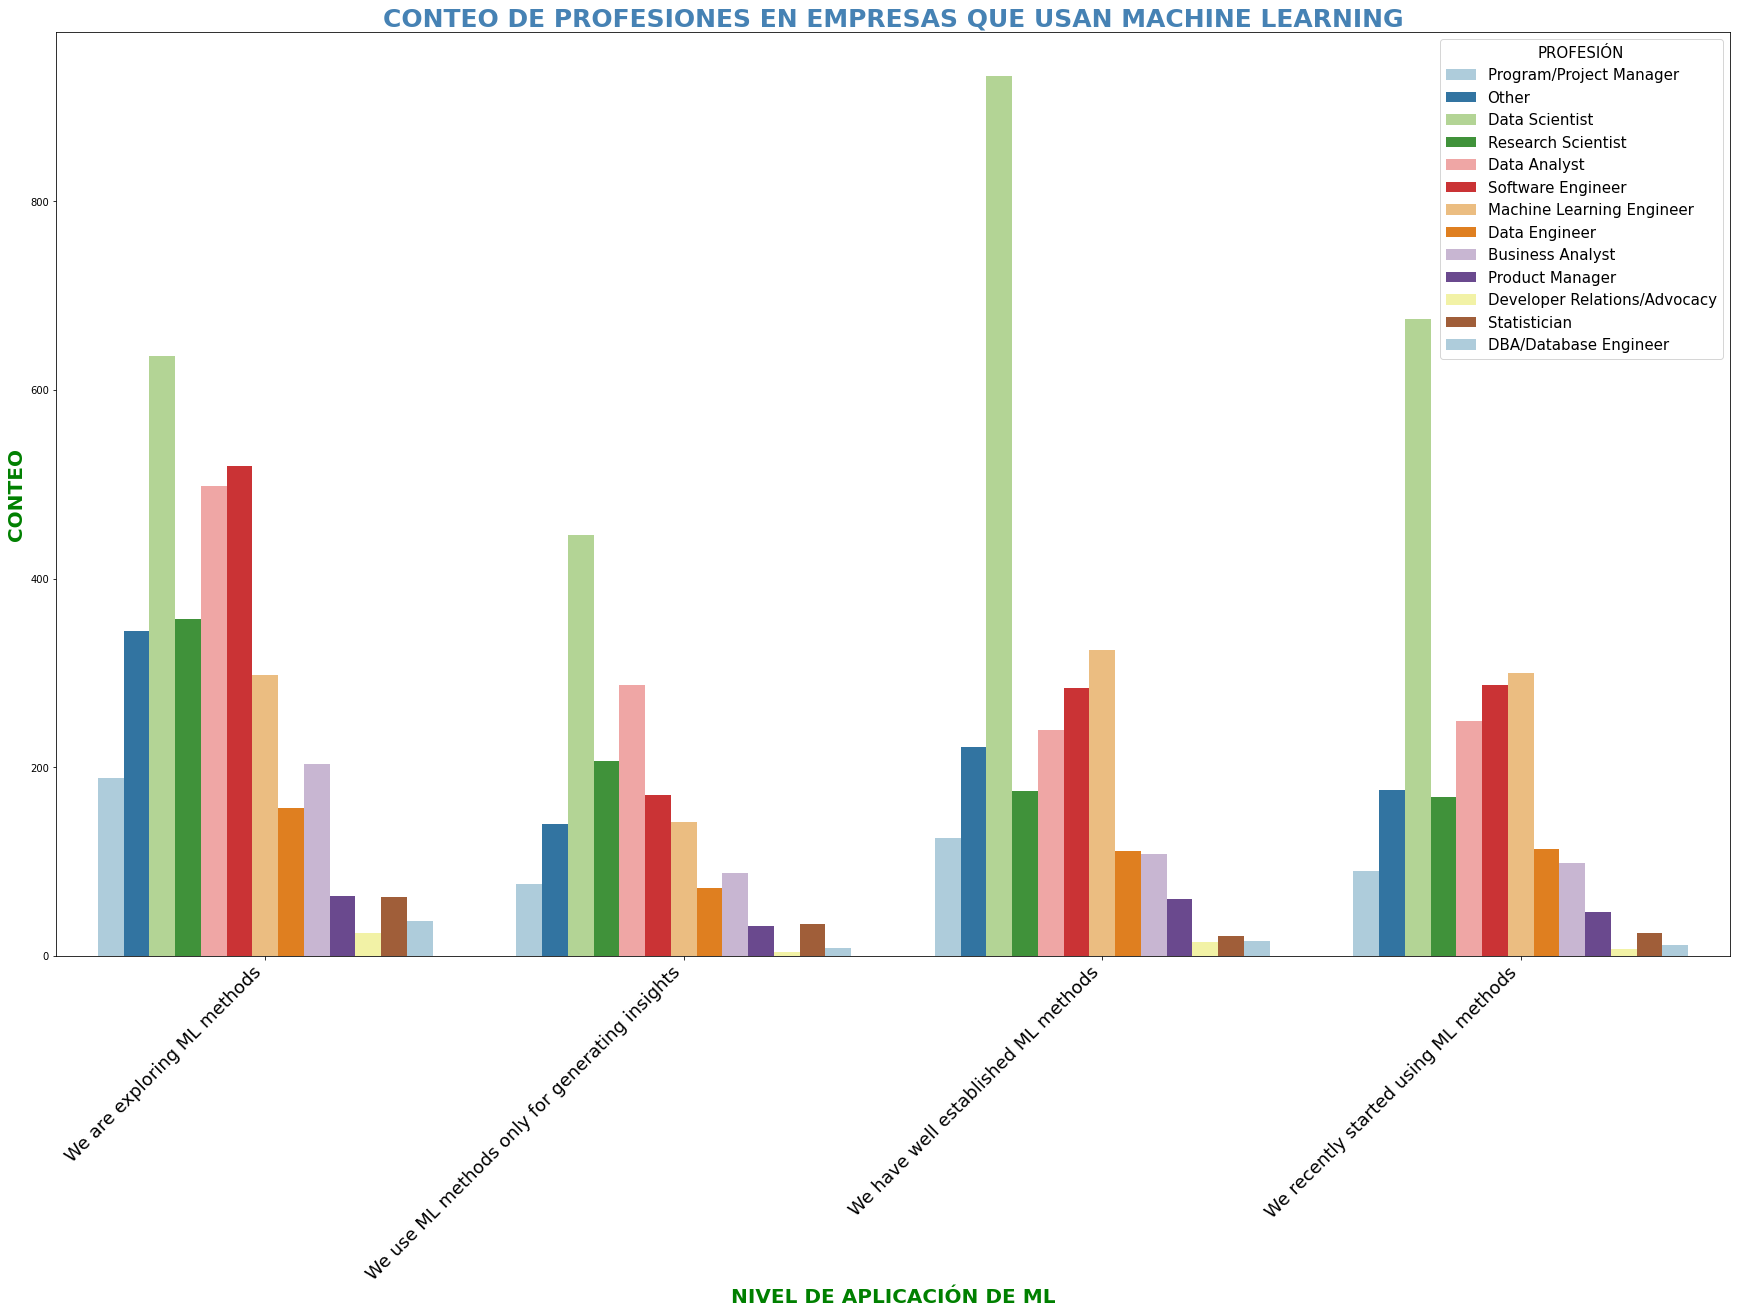

In [21]:
# Gráfica para ver cuantos profesionales de cada tipo hay en empresas que usan ML

plt.figure(figsize=(30,17))
fig = sns.countplot(data = df3, x = 'q_23_current_use_of_ml', hue='q_5_role',palette='Paired')
plt.title("CONTEO DE PROFESIONES EN EMPRESAS QUE USAN MACHINE LEARNING", fontsize = 25, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('NIVEL DE APLICACIÓN DE ML', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20 , color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':15}, loc='upper right')
legend.set_title ("PROFESIÓN", prop = {'size': 15})
plt.xticks(rotation=45, horizontalalignment='right', fontsize=18)

plt.show(); 

> * Se ve que en las compañías donde han establecido el ML durante más tiempo son las que tienen más Data Scientists en su equipo, seguidos de Data Analysts y Software Engineers y ML Engineers